# NICK Kennedy's notebook

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [ ]:
#extract IMDB movie basics table from SQL database

In [13]:
!cd

C:\Users\Nick\Documents\Flatiron\phase_1\project\gitrepo\microsoft-movie-analysis-ncs


In [22]:
conn = sqlite3.connect('C:/Users/Nick/Documents/Flatiron/phase_1/project/data/im.db')

In [23]:
movie_basics_df = pd.read_sql("""
SELECT * 
FROM movie_basics
""",conn )

In [24]:
movie_basics_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [25]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#extract csvs to dataframes. bom, tn, tmdb

In [75]:
bom_raw_df = pd.read_csv('bom.movie_gross.csv')
bom_raw_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [31]:
tn_raw_df = pd.read_csv('tn.movie_budgets.csv')
tn_raw_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [ ]:
#Create clean title columns for matching 1) MOVIE_BASICS

In [32]:
movie_basics_df['clean_title'] = movie_basics_df['primary_title'].str.lower()

In [34]:
movie_basics_df['clean_title'] = movie_basics_df['clean_title'].str.replace("'","").replace(',', '').replace(':','').replace('.','').replace('-','')

In [35]:
#move clean title to the front then rest index
movie_basics_df.set_index('clean_title', inplace = True)

In [37]:
movie_basics_df.reset_index(inplace = True)
movie_basics_df.head(2)

,index,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,one day before the rainy season,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [ ]:
#2) BOM RAW

In [76]:
bom_raw_df['clean_title'] = bom_raw_df['title'].str.lower()

In [77]:
bom_raw_df['clean_title'] = bom_raw_df['clean_title'].str.replace("'","").replace(',', '').replace(':','').replace('.','').replace('-','')

In [80]:
bom_raw_df.set_index('clean_title', inplace = True)
bom_raw_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
clean_title,,,,,
toy story 3,Toy Story 3,BV,415000000.0,652000000.0,2010
alice in wonderland (2010),Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [47]:
#tn_budgets

In [50]:
tn_raw_df['clean_title'] = tn_raw_df['movie'].str.lower()

In [63]:
for title in tn_raw_df['clean_title']: 
    title.replace("'","").replace(',', '').replace(':','').replace('.','').replace('-','')

In [64]:

tn_raw_df.reset_index( inplace = True)
tn_raw_df.head(2)

,level_0,index,clean_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,0,avatar,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,1,pirates of the caribbean: on stranger tides,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [61]:
bom_raw_df

,title,studio,domestic_gross,foreign_gross,year
clean_title,,,,,
toy story 3,Toy Story 3,BV,415000000.0,652000000.0,2010
alice in wonderland (2010),Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
harry potter and the deathly hallows part 1,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
inception,Inception,WB,292600000.0,535700000.0,2010
shrek forever after,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
the quake,The Quake,Magn.,6200.0,NaN,2018
edward ii (2018 re-release),Edward II (2018 re-release),FM,4800.0,NaN,2018
el pacto,El Pacto,Sony,2500.0,NaN,2018


In [65]:
#CLEAN title not eliminating punctuation rn so going to do it in excel
tn_raw_df.to_csv('tn_raw_clean_fix.csv')
#checking the others
bom_raw_df.to_csv('bom_raw_clean_fix.csv')
movie_basics_df.to_csv('movie_basics_clean_fix.csv')

In [ ]:
#that didn't work for the movie_basics because the file is too large so

In [ ]:
#engineer a foreign_gross for tn and worldwide_gross for bom

In [81]:
bom_raw_df['worldwide_gross'] = bom_raw_df['foreign_gross'] + bom_raw_df['domestic_gross']

In [72]:
#having trouble fixing number formats so
tn_raw_df.to_csv('tn_numfix.csv')

In [73]:
tn_fixed_df = pd.read_csv('tn_numfix.csv')
tn_fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5782 non-null   int64 
 1   level_0            5782 non-null   int64 
 2   index              5782 non-null   int64 
 3   clean_title        5782 non-null   object
 4   id                 5782 non-null   int64 
 5   release_date       5782 non-null   object
 6   movie              5782 non-null   object
 7   production_budget  5782 non-null   int64 
 8   domestic_gross     5782 non-null   int64 
 9   worldwide_gross    5782 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 451.8+ KB


In [82]:
#now to engineer foreign gross
tn_raw_df['foreign_gross'] = tn_raw_df['worldwide_gross'] + tn_raw_df['domestic_gross']


# NOW TO JOIN THEM and clean them

In [87]:

tn_raw_df.drop(['level_0', 'index'], axis = 1, inplace =True)

In [88]:
tn_raw_df.set_index('clean_title', inplace=True)

In [89]:

tn_mbasics_merge = movie_basics_df.join(tn_raw_df, on='clean_title')
tn_mbasics_merge.head(2)

,index,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,0,sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,one day before the rainy season,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
tn_mbasics_merge.drop('index', axis=1, inplace=True)

In [90]:
#check the merge info
tn_mbasics_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146353 entries, 0 to 146143
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              146353 non-null  int64  
 1   clean_title        146353 non-null  object 
 2   movie_id           146353 non-null  object 
 3   primary_title      146353 non-null  object 
 4   original_title     146332 non-null  object 
 5   start_year         146353 non-null  int64  
 6   runtime_minutes    114581 non-null  float64
 7   genres             140940 non-null  object 
 8   id                 3897 non-null    float64
 9   release_date       3897 non-null    object 
 10  movie              3897 non-null    object 
 11  production_budget  3897 non-null    object 
 12  domestic_gross     3897 non-null    object 
 13  worldwide_gross    3897 non-null    object 
 14  foreign_gross      3897 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 1

In [96]:
#lets try merging this with bom before dropping nulls
all_merged_df = tn_mbasics_merge.join(bom_raw_df, on='clean_title', rsuffix = 'bom')

In [97]:
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146355 entries, 0 to 146143
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   clean_title         146355 non-null  object 
 1   movie_id            146355 non-null  object 
 2   primary_title       146355 non-null  object 
 3   original_title      146334 non-null  object 
 4   start_year          146355 non-null  int64  
 5   runtime_minutes     114583 non-null  float64
 6   genres              140942 non-null  object 
 7   id                  3897 non-null    float64
 8   release_date        3897 non-null    object 
 9   movie               3897 non-null    object 
 10  production_budget   3897 non-null    object 
 11  domestic_gross      3897 non-null    object 
 12  worldwide_gross     3897 non-null    object 
 13  foreign_gross       3897 non-null    object 
 14  title               3515 non-null    object 
 15  studio              3512 non-null 

In [101]:
#now to drop NAs
all_merged_df.dropna(subset = ['release_date'], inplace =True)


In [102]:
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 20 to 146078
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_title         3897 non-null   object 
 1   movie_id            3897 non-null   object 
 2   primary_title       3897 non-null   object 
 3   original_title      3896 non-null   object 
 4   start_year          3897 non-null   int64  
 5   runtime_minutes     3401 non-null   float64
 6   genres              3824 non-null   object 
 7   id                  3897 non-null   float64
 8   release_date        3897 non-null   object 
 9   movie               3897 non-null   object 
 10  production_budget   3897 non-null   object 
 11  domestic_gross      3897 non-null   object 
 12  worldwide_gross     3897 non-null   object 
 13  foreign_gross       3897 non-null   object 
 14  title               1666 non-null   object 
 15  studio              1666 non-null   object 
 16  dom

In [105]:
all_merged_df['foreign_gross']

20                      $73,706$0
33        $122,133,227$70,433,227
40           $1,165,996$1,109,808
48             $9,313,302$720,828
54        $187,861,183$58,236,838
                   ...           
145843       $6,916,869$6,916,869
145937      $10,551,417$8,224,288
145986                       $0$0
146025       $1,110,511$1,017,107
146078    $165,720,921$81,562,942
Name: foreign_gross, Length: 3897, dtype: object

In [106]:
#looks like we need to take a closer look in excel and fix numbers
all_merged_df.to_csv('all_merged_fixup.csv')

In [107]:
final_merge_df = pd.read_csv('all_merged_fixup.csv')

In [108]:
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   clean_title         3897 non-null   object 
 2   movie_id            3897 non-null   object 
 3   primary_title       3897 non-null   object 
 4   original_title      3896 non-null   object 
 5   start_year          3897 non-null   int64  
 6   runtime_minutes     3401 non-null   float64
 7   genres              3824 non-null   object 
 8   id                  3897 non-null   int64  
 9   release_date        3897 non-null   object 
 10  movie               3897 non-null   object 
 11  production_budget   3897 non-null   int64  
 12  domestic_gross      3897 non-null   int64  
 13  worldwide_gross     3897 non-null   int64  
 14  foreign_gross       3897 non-null   int64  
 15  title               1666 non-null   object 
 16  studio

In [109]:
#Great now lets lets look at genres
genres_imdb_list= set(list([x for x in final_merge_df['genres']]))


In [110]:
genres_imdb_list = list(genres_imdb_list)
genres_working1 = []
for x in genres_imdb_list:
       genres_working1.append(str(x))


In [112]:
genres_working2 = []
for x in genres_working1:
    for y in x.split(sep =','):
        genres_working2.append(y)
imdb_genres = list(set(genres_working2))
imdb_genres.pop(1)
imdb_genres.pop(-9)
imdb_genres

['Sport',
 'Crime',
 'News',
 'Romance',
 'Sci-Fi',
 'Western',
 'Horror',
 'Drama',
 'Family',
 'nan',
 'Mystery',
 'Musical',
 'Fantasy',
 'Adventure',
 'Documentary',
 'Thriller',
 'Comedy',
 'Reality-TV',
 'Music',
 'History',
 'Action',
 'Animation']

# NOW TO BUILD BOOLEAN GENRE COLUMNS


In [113]:
for x in imdb_genres:
    final_merge_df[x] = (final_merge_df['genres'].str.contains(x))


In [114]:
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   clean_title         3897 non-null   object 
 2   movie_id            3897 non-null   object 
 3   primary_title       3897 non-null   object 
 4   original_title      3896 non-null   object 
 5   start_year          3897 non-null   int64  
 6   runtime_minutes     3401 non-null   float64
 7   genres              3824 non-null   object 
 8   id                  3897 non-null   int64  
 9   release_date        3897 non-null   object 
 10  movie               3897 non-null   object 
 11  production_budget   3897 non-null   int64  
 12  domestic_gross      3897 non-null   int64  
 13  worldwide_gross     3897 non-null   int64  
 14  foreign_gross       3897 non-null   int64  
 15  title               1666 non-null   object 
 16  studio

In [115]:
#OK all set lets save this down
final_merge_df.to_csv('final_data_nk.csv')

# Now to merge in ratings info as well as Chris' data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
final_data_df = pd.read_csv('final_data_NK.csv')

In [3]:
final_data_df.head(2)

,Unnamed: 0,Unnamed: 0.1,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,...,Fantasy,Adventure,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation
0,0,20,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,...,False,False,False,False,True,False,False,False,True,True
1,1,33,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,...,True,True,False,False,False,False,False,False,True,False


In [9]:
final_data_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace =True)

In [10]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_title         3897 non-null   object 
 1   movie_id            3897 non-null   object 
 2   primary_title       3897 non-null   object 
 3   original_title      3896 non-null   object 
 4   start_year          3897 non-null   int64  
 5   runtime_minutes     3401 non-null   float64
 6   genres              3824 non-null   object 
 7   id                  3897 non-null   int64  
 8   release_date        3897 non-null   object 
 9   movie               3897 non-null   object 
 10  production_budget   3897 non-null   int64  
 11  domestic_gross      3897 non-null   int64  
 12  worldwide_gross     3897 non-null   int64  
 13  foreign_gross       3897 non-null   int64  
 14  title               1666 non-null   object 
 15  studio              1666 non-null   object 
 16  domest

In [4]:
import sqlite3
conn = sqlite3.connect('C:/Users/Nick/Documents/Flatiron/phase_1/project/data/im.db')

In [5]:
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
movie_ratings_df.set_index('movie_id', inplace = True)

In [11]:
ratings_join_df = final_data_df.join(movie_ratings_df, on='movie_id')

In [12]:
ratings_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_title         3897 non-null   object 
 1   movie_id            3897 non-null   object 
 2   primary_title       3897 non-null   object 
 3   original_title      3896 non-null   object 
 4   start_year          3897 non-null   int64  
 5   runtime_minutes     3401 non-null   float64
 6   genres              3824 non-null   object 
 7   id                  3897 non-null   int64  
 8   release_date        3897 non-null   object 
 9   movie               3897 non-null   object 
 10  production_budget   3897 non-null   int64  
 11  domestic_gross      3897 non-null   int64  
 12  worldwide_gross     3897 non-null   int64  
 13  foreign_gross       3897 non-null   int64  
 14  title               1666 non-null   object 
 15  studio              1666 non-null   object 
 16  domest

In [13]:
ratings_join_df.head()

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation,averagerating,numvotes
0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,31-Dec-12,Foodfight!,...,False,False,True,False,False,False,True,True,1.9,8248.0
1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,18-Aug-95,Mortal Kombat,...,False,False,False,False,False,False,True,False,NaN,NaN
2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,19-Jun-15,The Overnight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,24.0
3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,22-Mar-13,On the Road,...,False,False,False,False,False,False,False,False,6.1,37886.0
4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,25-Dec-13,The Secret Life of Walter Mitty,...,False,False,True,False,False,False,False,False,7.3,275300.0


In [19]:
ratings_join_df['release_date'] = pd.to_datetime(ratings_join_df['release_date'])

In [20]:
ratings_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   clean_title         3897 non-null   object        
 1   movie_id            3897 non-null   object        
 2   primary_title       3897 non-null   object        
 3   original_title      3896 non-null   object        
 4   start_year          3897 non-null   int64         
 5   runtime_minutes     3401 non-null   float64       
 6   genres              3824 non-null   object        
 7   id                  3897 non-null   int64         
 8   release_date        3897 non-null   datetime64[ns]
 9   movie               3897 non-null   object        
 10  production_budget   3897 non-null   int64         
 11  domestic_gross      3897 non-null   int64         
 12  worldwide_gross     3897 non-null   int64         
 13  foreign_gross       3897 non-null   int64       

In [21]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Untitled.ipynb
all_merged_fixup.csv
bom.movie_gross.csv
bom_genres_fixed_tues_am.csv
bom_raw_clean_fix.csv
bomwithgenres_roughdraft.csv
dsc-phase1-project-template.ipynb
final_data_nk.csv
genre_id_key.csv
im.db
movie_basics_clean_fix.csv
nick_scratch.ipynb
notebook_nk.ipynb
rt_reviews.csv
rtmovie_info.csv
tmdb.movies.csv
tn.movie_budgets.csv
tn_numfix.csv
tn_raw_clean_fix.csv


In [22]:
!cd ..

In [23]:
cd

C:\Users\Nick


In [24]:
cd Documents

C:\Users\Nick\Documents


In [25]:
cd Flatiron/phase_1/project/data

C:\Users\Nick\Documents\Flatiron\phase_1\project\data


In [26]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7C99-DF07

 Directory of C:\Users\Nick\Documents\Flatiron\phase_1\project\data

01/25/2022  03:21 PM    <DIR>          .
01/25/2022  03:21 PM    <DIR>          ..
01/25/2022  09:24 AM    <DIR>          .ipynb_checkpoints
01/25/2022  03:19 PM        44,365,937 all_data.xlsx
06/13/2019  11:42 PM           142,555 bom.movie_gross.csv
01/25/2022  10:23 AM           494,060 bom_genres_fixed_tues_am.csv
01/24/2022  11:07 PM           467,438 bom_genres_numfix.csv
01/24/2022  01:43 PM           320,049 bomwithgenres_roughdraft.csv
01/21/2022  05:34 PM           416,742 csv_data.csv
01/23/2022  06:43 PM               260 genre_id_key.csv
01/21/2022  06:55 PM       169,443,328 im.db
01/21/2022  06:58 PM                22 im.db.zip
01/25/2022  03:21 PM           108,780 Merged_DataFrame_CH.csv
01/25/2022  01:58 PM            59,898 nick_scratch.ipynb
01/23/2022  02:47 PM           478,896 practice_join.csv
12/12/2018  01:46 AM         1,1

In [28]:
ratings_join_df.loc[ratings_join_df['clean_title']== 'avatar',:]

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation,averagerating,numvotes
1071,avatar,tt1775309,Avatar,AbatÃ¢,2011,93.0,Horror,1,2009-12-18,Avatar,...,False,False,False,False,False,False,False,False,6.1,43.0


In [29]:
chris_df = pd.read_csv('Merged_DataFrame_CH.csv')

In [31]:
chris_df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,0,1,18-Dec-09,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,2,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,3,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
4,4,9,17-Nov-17,Justice League,300,229,655,426,"[action, adventure, fantasy, sci-fi]"


In [33]:
chris_df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [34]:
chris_df['clean_title'] = chris_df['movie'].str.lower()

In [36]:
chris_df.set_index('clean_title', inplace = True)

In [38]:
merged_all_df = ratings_join_df.join(chris_df, on='clean_title', rsuffix = '_CH')

In [39]:
merged_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5378 entries, 0 to 3896
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           5378 non-null   object        
 1   movie_id              5378 non-null   object        
 2   primary_title         5378 non-null   object        
 3   original_title        5377 non-null   object        
 4   start_year            5378 non-null   int64         
 5   runtime_minutes       4682 non-null   float64       
 6   genres                5279 non-null   object        
 7   id                    5378 non-null   int64         
 8   release_date          5378 non-null   datetime64[ns]
 9   movie                 5378 non-null   object        
 10  production_budget     5378 non-null   int64         
 11  domestic_gross        5378 non-null   int64         
 12  worldwide_gross       5378 non-null   int64         
 13  foreign_gross     

In [40]:
merged_all_df.sort_values('clean_title')

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,Animation,averagerating,numvotes,release_date_CH,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,genre_ids
2373,#horror,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",16,2015-11-20,#Horror,...,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,10 cloverfield lane,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",54,2016-03-11,10 Cloverfield Lane,...,False,7.2,260383.0,11-Mar-16,10 Cloverfield Lane,5.0,72.0,108.0,36.0,"[thriller, sci-fi, drama]"
2329,10 days in a madhouse,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,48,2015-11-11,10 Days in a Madhouse,...,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2367,12 rounds,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance",37,2009-03-27,12 Rounds,...,False,8.1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,12 strong,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",64,2018-01-19,12 Strong,...,False,6.6,50155.0,19-Jan-18,12 Strong,35.0,45.0,71.0,26.0,"[war, drama, history, action]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,zoom,tt6117454,Zoom,Zoom,2016,NaN,"Crime,Thriller",26,2006-08-11,Zoom,...,False,NaN,NaN,11-Aug-06,Zoom,35.0,11.0,12.0,1.0,"[animation, comedy, drama]"
3152,zoom,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",26,2006-08-11,Zoom,...,False,7.2,85.0,11-Aug-06,Zoom,35.0,11.0,12.0,1.0,"[animation, comedy, drama]"
2472,zoom,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama",26,2006-08-11,Zoom,...,True,6.1,2323.0,11-Aug-06,Zoom,35.0,11.0,12.0,1.0,"[animation, comedy, drama]"
2103,zootopia,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",57,2016-03-04,Zootopia,...,True,8.0,383446.0,4-Mar-16,Zootopia,150.0,341.0,1019.0,678.0,"[animation, adventure, family, comedy]"


In [41]:
merged_all_df.to_csv('merged_all.csv')

In [42]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7C99-DF07

 Directory of C:\Users\Nick\Documents\Flatiron\phase_1\project\data

01/25/2022  04:31 PM    <DIR>          .
01/25/2022  04:31 PM    <DIR>          ..
01/25/2022  09:24 AM    <DIR>          .ipynb_checkpoints
01/25/2022  03:19 PM        44,365,937 all_data.xlsx
06/13/2019  11:42 PM           142,555 bom.movie_gross.csv
01/25/2022  10:23 AM           494,060 bom_genres_fixed_tues_am.csv
01/24/2022  11:07 PM           467,438 bom_genres_numfix.csv
01/24/2022  01:43 PM           320,049 bomwithgenres_roughdraft.csv
01/21/2022  05:34 PM           416,742 csv_data.csv
01/23/2022  06:43 PM               260 genre_id_key.csv
01/21/2022  06:55 PM       169,443,328 im.db
01/21/2022  06:58 PM                22 im.db.zip
01/25/2022  04:28 PM         1,270,318 merged_all.csv
01/25/2022  03:21 PM           108,780 Merged_DataFrame_CH.csv
01/25/2022  04:31 PM            79,865 Merged_DataFrame_V2.csv
01/25/2022  01:58 PM          

In [43]:
chris_df2 = pd.read_csv('Merged_DataFrame_V2.csv')

In [45]:
chris_df2['clean_title'] = chris_df2['movie'].str.lower()

In [46]:
chris_df2.set_index('clean_title', inplace = True)

In [48]:
chris_df2.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [49]:
chris_df2.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
clean_title,,,,,,,
avatar,"Dec 18, 2009",Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
pirates of the caribbean: on stranger tides,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"


In [50]:
merged_all_df2 = ratings_join_df.join(chris_df2, on='clean_title', rsuffix = '_CH')

In [51]:
merged_all_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           3897 non-null   object        
 1   movie_id              3897 non-null   object        
 2   primary_title         3897 non-null   object        
 3   original_title        3896 non-null   object        
 4   start_year            3897 non-null   int64         
 5   runtime_minutes       3401 non-null   float64       
 6   genres                3824 non-null   object        
 7   id                    3897 non-null   int64         
 8   release_date          3897 non-null   datetime64[ns]
 9   movie                 3897 non-null   object        
 10  production_budget     3897 non-null   int64         
 11  domestic_gross        3897 non-null   int64         
 12  worldwide_gross       3897 non-null   int64         
 13  foreign_gross     

In [52]:
merged_all_df2.to_csv('master_data_raw.csv')

# Exploring the full data

<AxesSubplot:ylabel='Frequency'>

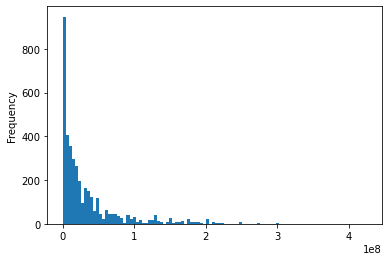

In [59]:
merged_all_df2['production_budget'].plot.hist(bins = 100)

<AxesSubplot:>

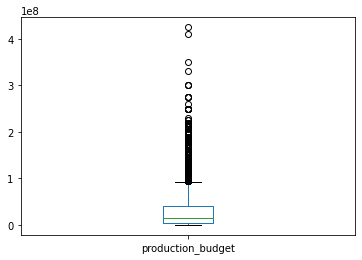

In [60]:
merged_all_df2['production_budget'].plot.box()

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

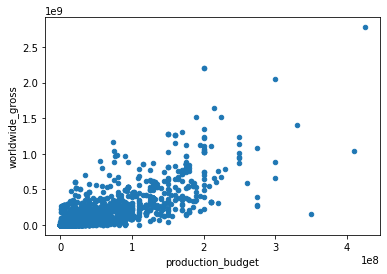

In [86]:
merged_all_df2[['production_budget', 'worldwide_gross']].plot.scatter(x='production_budget', y='worldwide_gross')

In [88]:
after_2010 = merged_all_df2[merged_all_df2['year'] >=2010]

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

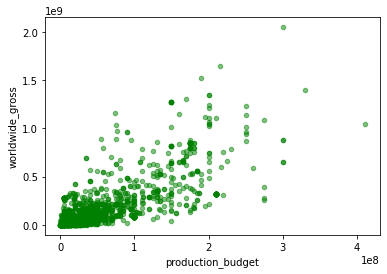

In [67]:
after_2010[['production_budget', 'worldwide_gross']].plot.scatter(x='production_budget', y='worldwide_gross', color = 'green', alpha=0.5)

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

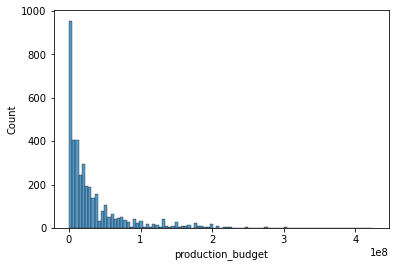

In [89]:
sns.histplot(merged_all_df2['production_budget'])

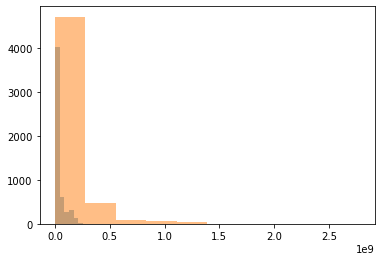

In [84]:
for col in ['production_budget' , 'worldwide_gross']:
    plt.hist(merged_all_df[col],  alpha = 0.5)

<AxesSubplot:xlabel='averagerating', ylabel='Count'>

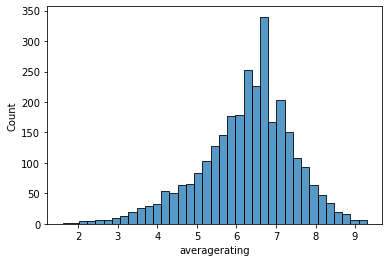

In [94]:
sns.histplot(merged_all_df2['averagerating'])

# NOW merging in persons info from IMDB database

In [92]:
director_df = pd.read_sql("""
SELECT * 
FROM directors
""", conn)

In [109]:
director_df.head(2)

,person_id
movie_id,
tt0285252,nm0899854
tt0462036,nm1940585


In [93]:
writer_df = pd.read_sql("""
SELECT * 
FROM directors
""", conn)

In [96]:
director_df.set_index('movie_id', inplace = True)

In [97]:
merge_wd = .join(director_df, on = 'movie_id')

In [98]:
writer_df.set_index('movie_id', inplace = True)

In [100]:
merged_wd_df = merge_direct_df.join(writer_df, on ='movie_id', rsuffix = '_w')

In [107]:
merged_wd_df = merged_wd_df.drop_duplicates(subset = ['movie_id', 'release_date'])

In [108]:
merged_wd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 3896
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           3897 non-null   object        
 1   movie_id              3897 non-null   object        
 2   primary_title         3897 non-null   object        
 3   original_title        3896 non-null   object        
 4   start_year            3897 non-null   int64         
 5   runtime_minutes       3401 non-null   float64       
 6   genres                3824 non-null   object        
 7   id                    3897 non-null   int64         
 8   release_date          3897 non-null   datetime64[ns]
 9   movie                 3897 non-null   object        
 10  production_budget     3897 non-null   int64         
 11  domestic_gross        3897 non-null   int64         
 12  worldwide_gross       3897 non-null   int64         
 13  foreign_gross     

In [110]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""", conn)

In [111]:
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [113]:
persons_df.set_index('person_id', inplace=True)

In [114]:
merge_final = merged_wd_df.join(persons_df, on='person_id')

In [115]:
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 3896
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           3897 non-null   object        
 1   movie_id              3897 non-null   object        
 2   primary_title         3897 non-null   object        
 3   original_title        3896 non-null   object        
 4   start_year            3897 non-null   int64         
 5   runtime_minutes       3401 non-null   float64       
 6   genres                3824 non-null   object        
 7   id                    3897 non-null   int64         
 8   release_date          3897 non-null   datetime64[ns]
 9   movie                 3897 non-null   object        
 10  production_budget     3897 non-null   int64         
 11  domestic_gross        3897 non-null   int64         
 12  worldwide_gross       3897 non-null   int64         
 13  foreign_gross     

In [116]:
persons_df.reset_index(inplace = True)

In [117]:
persons_df['person_id_w'] = persons_df['person_id']

In [119]:
persons_df.set_index('person_id_w', inplace = True)

In [120]:
master_merge = merge_final.join(persons_df, on='person_id_w', rsuffix = '_w')

# FEATURE ENGINEERING PROFIT and ROI

In [203]:
master_merge['worlwide_profit'] = master_merge['worldwide_gross'] - master_merge['production_budget']

In [204]:
master_merge['ROI'] = master_merge['worlwide_profit'].astype('float')//master_merge['production_budget'].astype('float')

In [230]:
master_merge.drop('nan', axis = 1, inplace = True)

In [275]:
master_merge.drop(['%ROI', '% ROI', 'Reality-TV'], axis = 1, inplace = True)

In [276]:
master_2010plus_df = master_merge[master_merge['year'] >= 2010]

In [172]:
master_2010plus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 3 to 3896
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           1666 non-null   object        
 1   movie_id              1666 non-null   object        
 2   primary_title         1666 non-null   object        
 3   original_title        1666 non-null   object        
 4   start_year            1666 non-null   int64         
 5   runtime_minutes       1563 non-null   float64       
 6   genres                1640 non-null   object        
 7   id                    1666 non-null   int64         
 8   release_date          1666 non-null   datetime64[ns]
 9   movie                 1666 non-null   object        
 10  production_budget     1666 non-null   int64         
 11  domestic_gross        1666 non-null   int64         
 12  worldwide_gross       1666 non-null   int64         
 13  foreign_gross     

# exploring the data by grouping

In [132]:
master_2010plus_df.groupby('person_id').sum().sort_values('worldwide_gross', ascending = False)

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_grossbom,foreign_grossbom,year,...,averagerating,numvotes,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,birth_year,death_year,birth_year_w,death_year_w
person_id,,,,,,,,,,,,,,,,,,,,,
nm0751577,6048,432.0,40,720000000,1346646789,3902605502,2555958713,1.346700e+09,1.199701e+09,6048.0,...,24.1,1920685.0,720.0,1345.0,3902.0,2557.0,5910.0,0.0,5910.0,0.0
nm0634240,8053,587.0,150,750000000,1118801468,3086180484,1967379016,1.116700e+09,1.999100e+09,8053.0,...,33.7,4994749.0,750.0,1118.0,3084.0,1966.0,7880.0,0.0,7880.0,0.0
nm1490123,8056,495.0,259,371500000,879478118,3083488461,2204010343,8.795000e+08,1.037801e+09,8057.0,...,28.7,1249832.0,371.0,879.0,3081.0,2202.0,7908.0,0.0,7908.0,0.0
nm0923736,8051,536.0,148,623600000,1128220169,2992084614,1863864445,4.590000e+08,9.464000e+08,2015.0,...,30.7,3048319.0,330.0,459.0,1403.0,944.0,7856.0,0.0,7856.0,0.0
nm0001392,6039,474.0,62,750000000,816490211,2922948044,2106457833,8.165000e+08,2.119000e+09,6039.0,...,23.1,1723813.0,750.0,816.0,2922.0,2106.0,5883.0,0.0,5883.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm0222816,2014,73.0,57,20000,0,0,0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1963.0,0.0,1963.0,0.0
nm3781779,2014,86.0,43,10000000,0,0,0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0908037,2013,98.0,18,600000,0,0,0,0.000000e+00,0.000000e+00,0.0,...,4.5,882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
master_2010plus_df.groupby('primary_name').mean().sort_values('worldwide_gross', ascending = False)[:20]

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_grossbom,foreign_grossbom,year,...,averagerating,numvotes,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,birth_year,death_year,birth_year_w,death_year_w
primary_name,,,,,,,,,,,,,,,,,,,,,
Atsushi Wada,2011.000000,93.000000,1.000000,425000000.0,7.605076e+08,2.776345e+09,2.015838e+09,NaN,NaN,NaN,...,6.100000,43.000000,425.0,760.000000,2776.000000,2016.000000,NaN,NaN,NaN,NaN
Pete Meads,2012.000000,NaN,43.000000,200000000.0,6.593639e+08,2.208208e+09,1.548844e+09,NaN,NaN,NaN,...,6.200000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ravi Punj,2018.000000,115.000000,43.000000,200000000.0,6.593639e+08,2.208208e+09,1.548844e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anthony Russo,2016.000000,144.000000,13.333333,240000000.0,4.488823e+08,1.300869e+09,8.519862e+08,4.489000e+08,3.999005e+08,2016.000000,...,8.033333,640228.333333,240.0,448.333333,1300.666667,852.333333,1970.0,NaN,1970.0,NaN
Chris Buck,2013.000000,102.000000,56.000000,150000000.0,4.007380e+08,1.272470e+09,8.717319e+08,4.007000e+08,8.757000e+08,2013.000000,...,7.500000,516998.000000,NaN,NaN,NaN,NaN,1958.0,NaN,1958.0,NaN
Chi-kin Kwok,2010.000000,92.000000,56.000000,150000000.0,4.007380e+08,1.272470e+09,8.717319e+08,4.007000e+08,8.757000e+08,2013.000000,...,5.400000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Green,2010.000000,93.000000,56.000000,150000000.0,4.007380e+08,1.272470e+09,8.717319e+08,4.007000e+08,8.757000e+08,2013.000000,...,6.200000,62311.000000,NaN,NaN,NaN,NaN,1975.0,NaN,1975.0,NaN
Kyle Balda,2017.000000,89.000000,30.000000,75000000.0,2.646243e+08,1.034728e+09,7.701034e+08,2.646000e+08,7.702000e+08,2017.000000,...,6.300000,92580.000000,75.0,264.000000,1034.000000,770.000000,1971.0,NaN,1971.0,NaN
Jared Bush,2016.000000,108.000000,57.000000,150000000.0,3.412682e+08,1.019430e+09,6.781614e+08,3.413000e+08,6.825000e+08,2016.000000,...,8.000000,383446.000000,150.0,341.000000,1019.000000,678.000000,1974.0,NaN,1974.0,NaN


C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

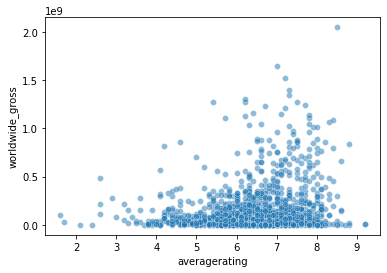

In [164]:
sns.scatterplot(master_2010plus_df['averagerating'],master_2010plus_df['worldwide_gross'], alpha = 0.5)

<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

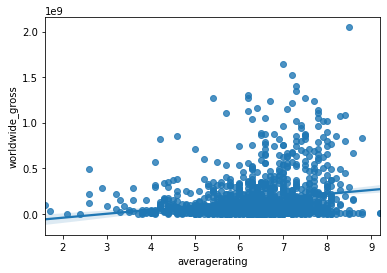

In [188]:
sns.regplot(master_2010plus_df['averagerating'],master_2010plus_df['worldwide_gross'])

In [189]:
master_2010plus_df['averagerating'].corr(master_2010plus_df['worldwide_gross'])

0.193461865788271

In [173]:
master2010_by_rating = master_2010plus_df.groupby('averagerating').mean()

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='averagerating', ylabel='ROI'>

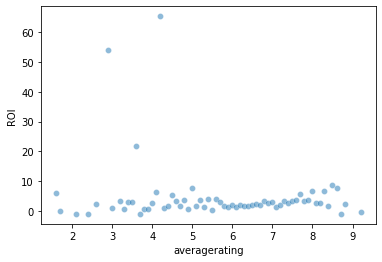

In [174]:
sns.scatterplot(master2010_by_rating.index, master2010_by_rating['ROI'], alpha = 0.5)

# Isolating/exploring sample looking only at films from 2014->

In [277]:
master2014_df = master_merge[master_merge['year'] > 2013]

In [197]:
master2014_df['averagerating'].corr(master2014_df['worldwide_gross'])

0.198065540652158

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_budget', ylabel='ROI'>

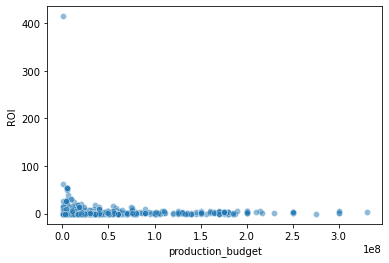

In [198]:
sns.scatterplot(master2014_df['production_budget'],master2014_df['ROI'], alpha = 0.5)

In [199]:
master2014_roi_fix = master2014_df[master2014_df['ROI'] < 100]

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_budget', ylabel='ROI'>

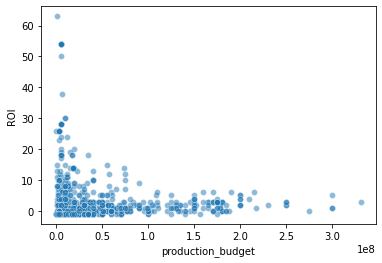

In [200]:
sns.scatterplot(master2014_roi_fix['production_budget'],master2014_roi_fix['ROI'], alpha = 0.5)

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

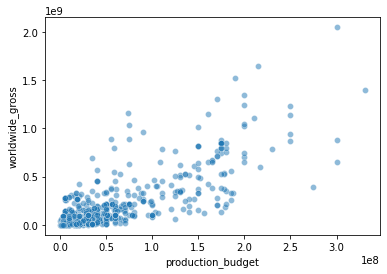

In [201]:
sns.scatterplot(master2014_df['production_budget'],master2014_df['worldwide_gross'], alpha = 0.5)

In [209]:
master2014_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 5 to 3890
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           882 non-null    object        
 1   movie_id              882 non-null    object        
 2   primary_title         882 non-null    object        
 3   original_title        882 non-null    object        
 4   start_year            882 non-null    int64         
 5   runtime_minutes       836 non-null    float64       
 6   genres                872 non-null    object        
 7   id                    882 non-null    int64         
 8   release_date          882 non-null    datetime64[ns]
 9   movie                 882 non-null    object        
 10  production_budget     882 non-null    int64         
 11  domestic_gross        882 non-null    int64         
 12  worldwide_gross       882 non-null    int64         
 13  foreign_gross      

In [ ]:
sns.scatterplot(master2014_df['production_budget'],master2014_df['worlwide_profit'], alpha = 0.5)

# Looking to see if there were significant changes in genre over time

In [278]:
#making subsets of master by year
master2014_only = master_merge[master_merge['year'] == 2014]
master2015_only = master_merge[master_merge['year'] == 2015]
master2016_only = master_merge[master_merge['year'] == 2016]
master2017_only = master_merge[master_merge['year'] == 2017]
master2018_only = master_merge[master_merge['year'] == 2018]
master2019_only = master_merge[master_merge['year'] == 2019]
master2020_only = master_merge[master_merge['year'] == 2020]


In [ ]:
master2014_only[genres].apply(pd.value_counts)

In [282]:
genres2014_df = master2014_only[genres].apply(pd.value_counts)

<AxesSubplot:>

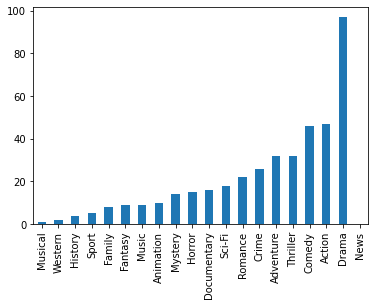

In [283]:
genres2014_df.loc[True].sort_values().plot.bar()

In [224]:
genres = master_merge.columns[20:42]


In [239]:
genres = list(genres)

In [281]:
genres.pop(-5)

'Reality-TV'

In [285]:
genres2015_df = master2015_only[genres].apply(pd.value_counts)
genres2016_df = master2016_only[genres].apply(pd.value_counts)
genres2017_df = master2017_only[genres].apply(pd.value_counts)
genres2018_df = master2018_only[genres].apply(pd.value_counts)
genres2019_df = master2019_only[genres].apply(pd.value_counts)
genres2020_df = master2020_only[genres].apply(pd.value_counts)

In [395]:
sns.set()

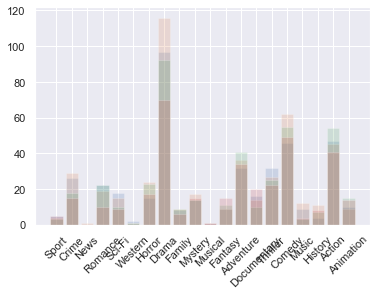

In [396]:
fig, ax = plt.subplots()

ax.bar(genres, genres2014_df.loc[True], alpha=0.2,)
ax.bar(genres, genres2015_df.loc[True], alpha=0.2)
ax.bar(genres, genres2016_df.loc[True], alpha=0.2)
ax.bar(genres, genres2017_df.loc[True], alpha=0.2)
plt.xticks(rotation = 45);

In [1]:
ax.bar(genres, [genres2014_df.loc[True],
 genres2015_df.loc[True], genres2016_df.loc[True], genres2017_df.loc[True]])
plt.xticks(rotation = 45);

NameError: name 'ax' is not defined

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='True'>

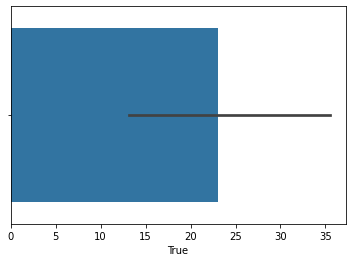

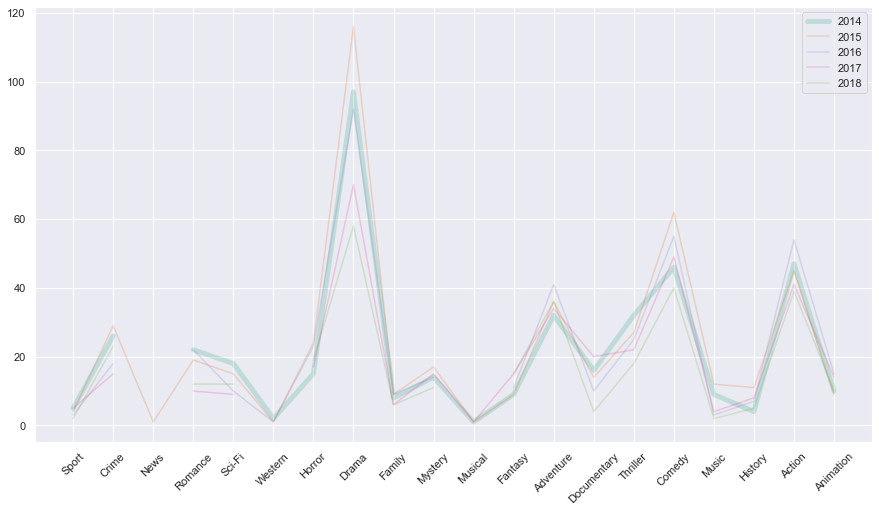

In [430]:
fig, ax = plt.subplots(figsize = (15,8))

ax.plot(genres, genres2014_df.loc[True], alpha=0.2, linewidth=5)
ax.plot(genres, genres2015_df.loc[True], alpha=0.2)
ax.plot(genres, genres2016_df.loc[True], alpha=0.2)
ax.plot(genres, genres2017_df.loc[True], alpha=0.2)
ax.plot(genres, genres2018_df.loc[True], alpha=0.2)
ax.legend(['2014','2015','2016','2017','2018'])

plt.xticks(rotation = 45);

# Looking at Directors

In [324]:
director_group_df = master_merge.groupby('primary_name_w').sum().sort_values('worlwide_profit', ascending=False)
director_group_df.head()

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_grossbom,foreign_grossbom,year,...,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,birth_year,death_year,birth_year_w,death_year_w,worlwide_profit,ROI
primary_name_w,,,,,,,,,,,,,,,,,,,,,
Anthony Russo,6048,432.0,40,720000000,1346646789,3902605502,2555958713,1.346700e+09,1.199701e+09,6048.0,...,720.0,1345.0,3902.0,2557.0,5910.0,0.0,5910.0,0.0,3182605502,11.0
James Wan,8056,495.0,259,371500000,879478118,3083488461,2204010343,8.795000e+08,1.037801e+09,8057.0,...,371.0,879.0,3081.0,2202.0,7908.0,0.0,7908.0,0.0,2711988461,91.0
Pierre Coffin,6038,284.0,145,219000000,955625140,2679017581,1723392441,9.556000e+08,1.717700e+09,6038.0,...,219.0,955.0,2678.0,1723.0,5901.0,0.0,5901.0,0.0,2460017581,31.0
Joss Whedon,8051,536.0,148,623600000,1128220169,2992084614,1863864445,4.590000e+08,9.464000e+08,2015.0,...,330.0,459.0,1403.0,944.0,7856.0,0.0,7856.0,0.0,2368484614,8.0
Atsushi Wada,2011,93.0,1,425000000,760507625,2776345279,2015837654,0.000000e+00,0.000000e+00,0.0,...,425.0,760.0,2776.0,2016.0,0.0,0.0,0.0,0.0,2351345279,5.0


C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_name_w', ylabel='worlwide_profit'>

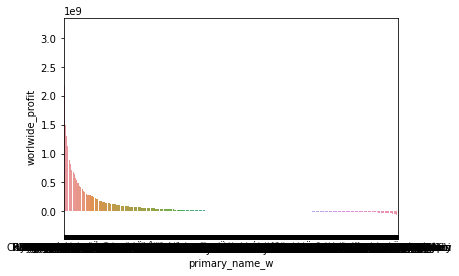

In [328]:
sns.barplot(director_group_df.index, director_group_df['worlwide_profit'].)

In [334]:
director_group_df['worlwide_profit'].sort_values()[-20:].sum()

40773839556

In [335]:
director_group_df['worlwide_profit'].sort_values()[:-20].sum()

192194554972

In [336]:
40773839556/192194554972

0.21214877581698485

<AxesSubplot:xlabel='primary_name_w'>

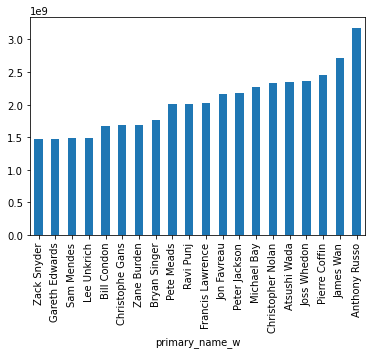

In [337]:
director_group_df['worlwide_profit'].sort_values()[-20:].plot.bar()

In [341]:
master_merge['primary_name_w']

0       Lawrence Kasanoff
1           Simon McQuoid
2          Jed I. Goodman
3           Walter Salles
4             Ben Stiller
              ...        
3892                  NaN
3893       Edwine Dorival
3894       Bill Guttentag
3895     Hatef Alimardani
3896         Nick Willing
Name: primary_name_w, Length: 3897, dtype: object

In [342]:
master_merge.to_csv('master_merge.csv')

<AxesSubplot:>

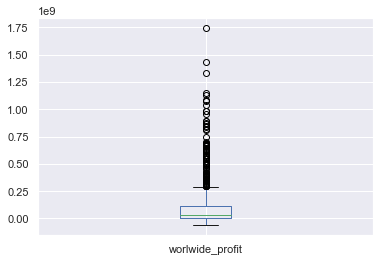

In [398]:
master2014_df['worlwide_profit'].plot.box()

In [350]:
a = master2014_df['worlwide_profit'].sort_values(ascending = False)[:20].sum()

In [351]:
b = master2014_df['worlwide_profit'].sort_values(ascending = False)[20:].sum()

In [462]:
# percentage of total global profit from top 20 movies over 21%
a/(b+a)

0.21104172782432867

In [353]:
len(master2014_df['worlwide_profit'].sort_values(ascending = False))

882

In [355]:

master2014_df.sort_values('worlwide_profit', ascending = False)[:20]

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,primary_profession,person_id_w,primary_name_w,birth_year_w,death_year_w,primary_profession_w,worlwide_profit,ROI,Biography,War
2623,avengers: infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018-04-27,Avengers: Infinity War,...,"producer,director,writer",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",1748134200,5.0,False,False
6,jurassic world,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015-06-12,Jurassic World,...,"writer,producer,director",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director",1433854864,6.0,False,False
2041,furious 7,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,2015-04-03,Furious 7,...,"producer,writer,director",nm1490123,James Wan,1977.0,NaN,"producer,writer,director",1328722794,6.0,False,False
1134,black panther,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018-02-16,Black Panther,...,"director,writer,producer",nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer",1148258224,5.0,False,False
2879,jurassic world: fallen kingdom,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",13,2018-06-22,Jurassic World: Fallen Kingdom,...,"director,writer,actor",nm1291105,J.A. Bayona,1975.0,NaN,"director,writer,actor",1135772799,6.0,False,False
1661,minions,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",73,2015-07-10,Minions,...,"actor,director,producer",nm1853544,Pierre Coffin,1967.0,NaN,"actor,director,producer",1086336173,14.0,False,False
1786,avengers: age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4,2015-05-01,Avengers: Age of Ultron,...,"writer,producer,director",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",1072413963,3.0,False,False
2410,incredibles 2,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44,2018-06-15,Incredibles 2,...,"miscellaneous,writer,director",nm0083348,Brad Bird,1957.0,NaN,"miscellaneous,writer,director",1042520711,5.0,False,False
649,aquaman,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",36,2018-12-21,Aquaman,...,"producer,writer,director",nm1490123,James Wan,1977.0,NaN,"producer,writer,director",986894640,6.0,False,False
2794,the fate of the furious,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",23,2017-04-14,The Fate of the Furious,...,"director,actor,producer",nm0336620,F. Gary Gray,1969.0,NaN,"director,actor,producer",984846267,3.0,False,False


<AxesSubplot:ylabel='Frequency'>

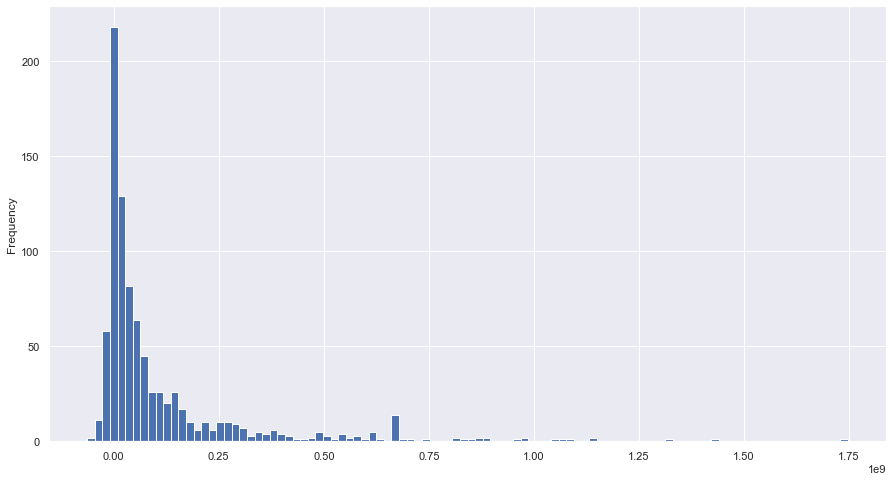

In [399]:
master2014_df['worlwide_profit'].plot.hist(figsize = (15,8), bins=100)

# isolating films that lost money

In [366]:
lost_money_df = 
master2014_df[master2014_df['worlwide_profit'] < 0]

In [367]:
lost_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 21 to 3861
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clean_title           210 non-null    object        
 1   movie_id              210 non-null    object        
 2   primary_title         210 non-null    object        
 3   original_title        210 non-null    object        
 4   start_year            210 non-null    int64         
 5   runtime_minutes       194 non-null    float64       
 6   genres                208 non-null    object        
 7   id                    210 non-null    int64         
 8   release_date          210 non-null    datetime64[ns]
 9   movie                 210 non-null    object        
 10  production_budget     210 non-null    int64         
 11  domestic_gross        210 non-null    int64         
 12  worldwide_gross       210 non-null    int64         
 13  foreign_gross     

In [528]:
sns.set_style('white')

# INVESTIGATING RATINGs and STUDIOS

In [577]:
top_studios=['BV', 'Uni.', 'Fox', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'Wein.',
       'FoxS', 'STX', 'LG/S', 'Focus', 'SGem', 'TriS', 'UTV', 'A24', 'ORF',
       'Studio 8', 'GrtIndia', 'Rela.', 'W/Dim.', 'MGM', 'SPC', 'Yash', 'Eros',
       'EOne', 'BH Tilt', 'PNT', 'RTWC', 'IFC', 'Neon', 'BST', 'EC', 'PFR',
       'Affirm', 'Orch.', 'RAtt.', 'MBox', 'Cleopatra', 'LGP', 'Trib.',
       'Annapurna', 'BBC', 'Cohen', 'Drft.', 'Global Road', 'DR', 'CE', 'XL',
       'Gold.', 'Free', 'ENTMP', 'TFA', 'Saban', 'RLJ', 'Alc', 'Amazon', 'BSC',
       'BG', 'Magn.', 'FCW', 'KE', 'VE']
master2014_df[master2014_df['studio'].isin(top_studios)]['averagerating'].median()


6.6

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


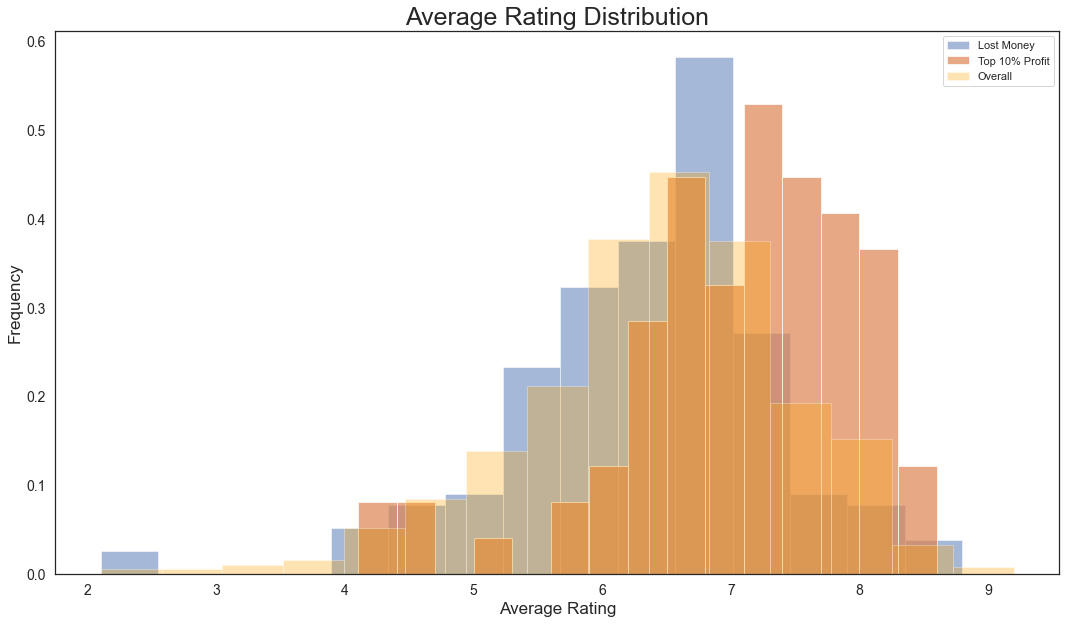

In [686]:
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(lost_money_df['averagerating'], alpha=0.5, bins = 15, density=True)
ax.hist(master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88], alpha = 0.7, bins=15 , density=True)
ax.hist(master2014_df['averagerating'], alpha = 0.3, color='orange', bins=15, density=True)
ax.legend(['Lost Money', 'Top 10% Profit', 'Overall'])
ax.set(title='Rating and Profit', xlabel='Average Rating', ylabel= 'Frequency')
ax.set_title('Average Rating Distribution', size=25);
ax.set_xlabel('Average Rating', size=17)
ax.set_ylabel('Frequency', size = 17)
plt.xticks(size=14)
plt.yticks(size = 14);


In [505]:
master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88].median()

7.15

In [506]:
master2014_df.sort_values('worlwide_profit', ascending = False)['averagerating'][:88].mean()

7.031707317073169

In [507]:
print(lost_money_df['averagerating'].median(),lost_money_df['averagerating'].mean())

6.5 6.349132947976879


<AxesSubplot:ylabel='Frequency'>

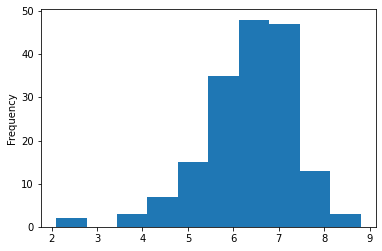

In [368]:
 lost_money_df['averagerating'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

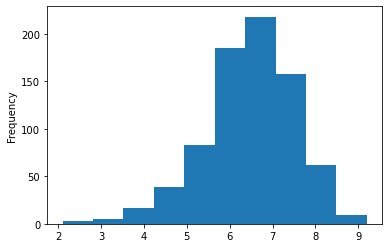

In [369]:
master2014_df['averagerating'].plot.hist()

In [373]:
top_20_df = master2014_df[master2014_df['worlwide_profit'] > 742000000]
top_20_df['averagerating'].mean()

7.189999999999998

In [520]:
top_20_df

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,...,primary_profession,person_id_w,primary_name_w,birth_year_w,death_year_w,primary_profession_w,worlwide_profit,ROI,Biography,War
6,jurassic world,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015-06-12,Jurassic World,...,"writer,producer,director",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director",1433854864,6.0,False,False
598,deadpool,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",56,2016-02-12,Deadpool,...,"director,writer,visual_effects",nm1783265,Tim Miller,NaN,NaN,"director,writer,visual_effects",743025593,12.0,False,False
649,aquaman,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",36,2018-12-21,Aquaman,...,"producer,writer,director",nm1490123,James Wan,1977.0,NaN,"producer,writer,director",986894640,6.0,False,False
1003,bohemian rhapsody,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.0,"Biography,Drama,Music",84,2018-11-02,Bohemian Rhapsody,...,"producer,director,writer",nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer",839985342,15.0,True,False
1134,black panther,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018-02-16,Black Panther,...,"director,writer,producer",nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer",1148258224,5.0,False,False
1473,transformers: age of extinction,tt2109248,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",37,2014-06-27,Transformers: Age of Extinction,...,"producer,director,actor",nm0000881,Michael Bay,1965.0,NaN,"producer,director,actor",894039076,4.0,False,False
1647,finding dory,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",46,2016-06-17,Finding Dory,...,"writer,actor,producer",nm0004056,Andrew Stanton,1965.0,NaN,"writer,actor,producer",821215193,4.0,False,False
1654,jumanji: welcome to the jungle,tt2283362,Jumanji: Welcome to the Jungle,Jumanji: Welcome to the Jungle,2017,119.0,"Action,Adventure,Comedy",38,2017-12-20,Jumanji: Welcome to the Jungle,...,"producer,director,actor",nm0440458,Jake Kasdan,1974.0,NaN,"producer,director,actor",874496193,9.0,False,False
1661,minions,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",73,2015-07-10,Minions,...,"actor,director,producer",nm1853544,Pierre Coffin,1967.0,NaN,"actor,director,producer",1086336173,14.0,False,False
1786,avengers: age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4,2015-05-01,Avengers: Age of Ultron,...,"writer,producer,director",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",1072413963,3.0,False,False


In [375]:
genres_lost_money = lost_money_df[genres].apply(pd.value_counts)

<AxesSubplot:>

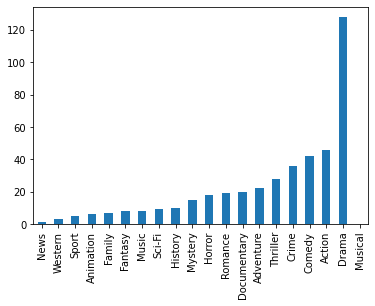

In [380]:
genres_lost_money.loc[True].sort_values().plot.bar()



In [381]:
top_20_genres = top_20_df[genres].apply(pd.value_counts)

<AxesSubplot:>

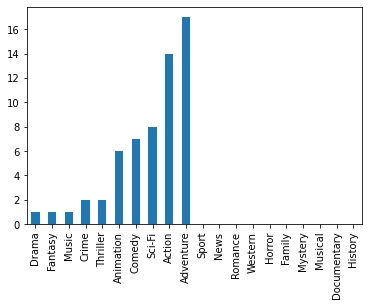

In [383]:
top_20_genres.loc[True].sort_values
().plot.bar()

In [530]:
studio_2014_df = master2014_df.groupby('studio').sum().sort_values('worlwide_profit', ascending = False)
studio_2014_df.index

Index(['BV', 'Uni.', 'Fox', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'Wein.',
       'FoxS', 'STX', 'LG/S', 'Focus', 'SGem', 'TriS', 'UTV', 'A24', 'ORF',
       'Studio 8', 'GrtIndia', 'Rela.', 'W/Dim.', 'MGM', 'SPC', 'Yash', 'Eros',
       'EOne', 'BH Tilt', 'PNT', 'RTWC', 'IFC', 'Neon', 'BST', 'EC', 'PFR',
       'Affirm', 'Orch.', 'RAtt.', 'MBox', 'Cleopatra', 'LGP', 'Trib.',
       'Annapurna', 'BBC', 'Cohen', 'Drft.', 'Global Road', 'DR', 'CE', 'XL',
       'Gold.', 'Free', 'ENTMP', 'TFA', 'Saban', 'RLJ', 'Alc', 'Amazon', 'BSC',
       'BG', 'Magn.', 'FCW', 'KE', 'VE'],
      dtype='object', name='studio')

In [619]:
studio_2014_df_avg = master2014_df.groupby('studio').mean().sort_values('worlwide_profit', ascending = False)
studio_2014_df_avg['averagerating']

8.3

In [624]:
studios2014_outliers_removed = studio_2014_df[10:]
studios2014_outliers_removed_mean = studio_2014_df_avg[10:]

In [628]:
studios2014_outliers_removed['averagerating']

studio
STX            107.0
LG/S            87.7
Focus          169.0
SGem            71.9
TriS            65.7
UTV             12.6
A24            138.9
ORF            130.9
Studio 8        26.3
GrtIndia         8.3
Rela.           59.1
W/Dim.          12.9
MGM              7.2
SPC             57.8
Yash            11.6
Eros             8.0
EOne            30.2
BH Tilt         43.0
PNT             10.6
RTWC            40.6
IFC            100.9
Neon             7.5
BST             55.8
EC              17.4
PFR             16.4
Affirm          12.7
Orch.            7.9
RAtt.          141.0
MBox             7.4
Cleopatra        7.4
LGP             10.9
Trib.            6.2
Annapurna       31.8
BBC              7.3
Cohen           13.9
Drft.            6.7
Global Road      6.1
DR              23.2
CE              12.1
XL               5.7
Gold.            7.5
Free             5.8
ENTMP           19.3
TFA              5.8
Saban            6.6
RLJ             10.7
Alc              5.2
Amazon

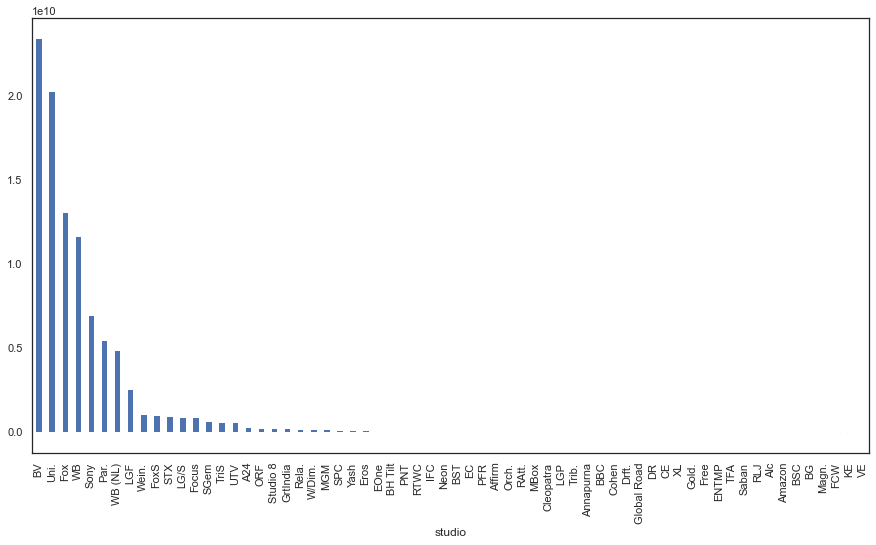

In [591]:
studio_2014_df['worlwide_profit'].plot.bar(figsize = (15,8))


<AxesSubplot:xlabel='studio'>

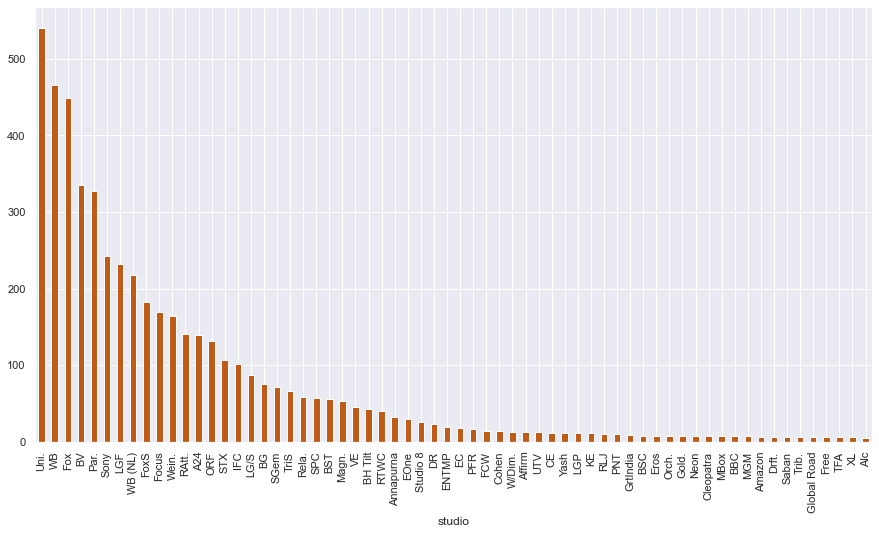

In [440]:
studio_2014_df['averagerating'].sort_values(ascending=False).plot.bar(figsize=(15,8))

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


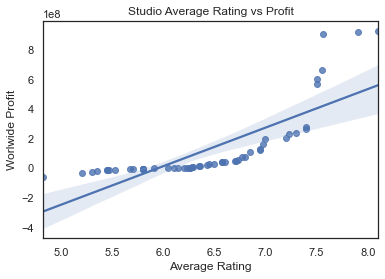

In [625]:
g = sns.regplot(studios2014_outliers_removed_mean['averagerating'].sort_values(ascending = False), studios2014_outliers_removed['worlwide_profit']).set(title='Studio Average Rating vs Profit', xlabel='Average Rating', ylabel='Worlwide Profit')


In [626]:
studios2014_outliers_removed_mean['averagerating'].corr(studios2014_outliers_removed['worlwide_profit'])

-0.05224139074524369

<AxesSubplot:xlabel='averagerating', ylabel='foreign_gross'>

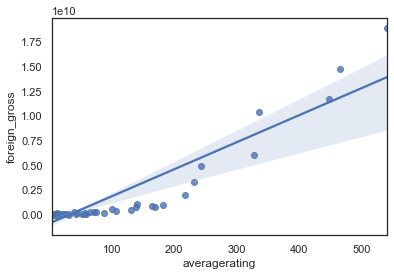

In [587]:
sns.regplot(studio_2014_df['averagerating'].sort_values(ascending = False), studio_2014_df['foreign_gross'])

<AxesSubplot:>

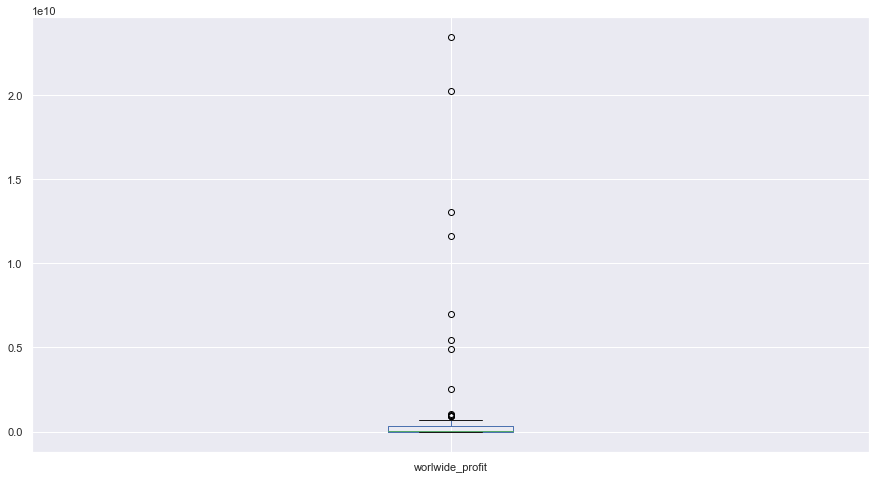

In [419]:
studio_2014_df['worlwide_profit'].plot.box(figsize = (15,8))

<AxesSubplot:>

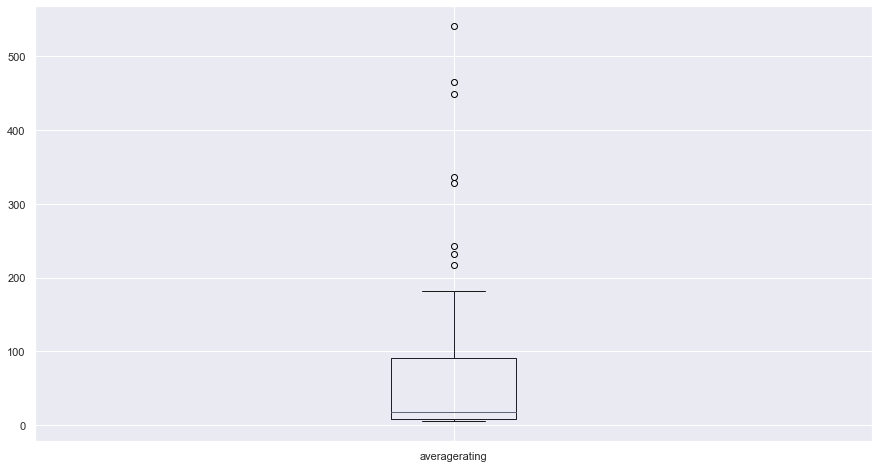

In [432]:
studio_2014_df['averagerating'].plot.box(figsize = (15,8))

In [413]:
studio_2014_df['averagerating'].corr(studio_2014_df['worlwide_profit'])

0.8507391169433233

In [465]:
studio_2014_df['averagerating'].corr(studio_2014_df['foreign_gross'])

0.8594084943481347

In [580]:
studio_2014_df['averagerating'][10:].corr(studio_2014_df['domestic_gross'])

0.7360949675582893

In [468]:
master2014_df['averagerating'].corr(master2014_df['domestic_gross'])

0.19467543823920735

In [ ]:
studio_2014_df[studio_2014_df['averagerating']]

In [426]:
sns.regplot(master2014_df['production_budget'],master2014_df['worlwide_profit'])

TypeError: regplot() got an unexpected keyword argument 'palette'

In [424]:
master2014_df['production_budget'].corr(master2014_df['worlwide_profit'])

0.7013841018838237

In [442]:
sns.set()

In [ ]:
no_outliers2014_df = master2014_df[]

<AxesSubplot:>

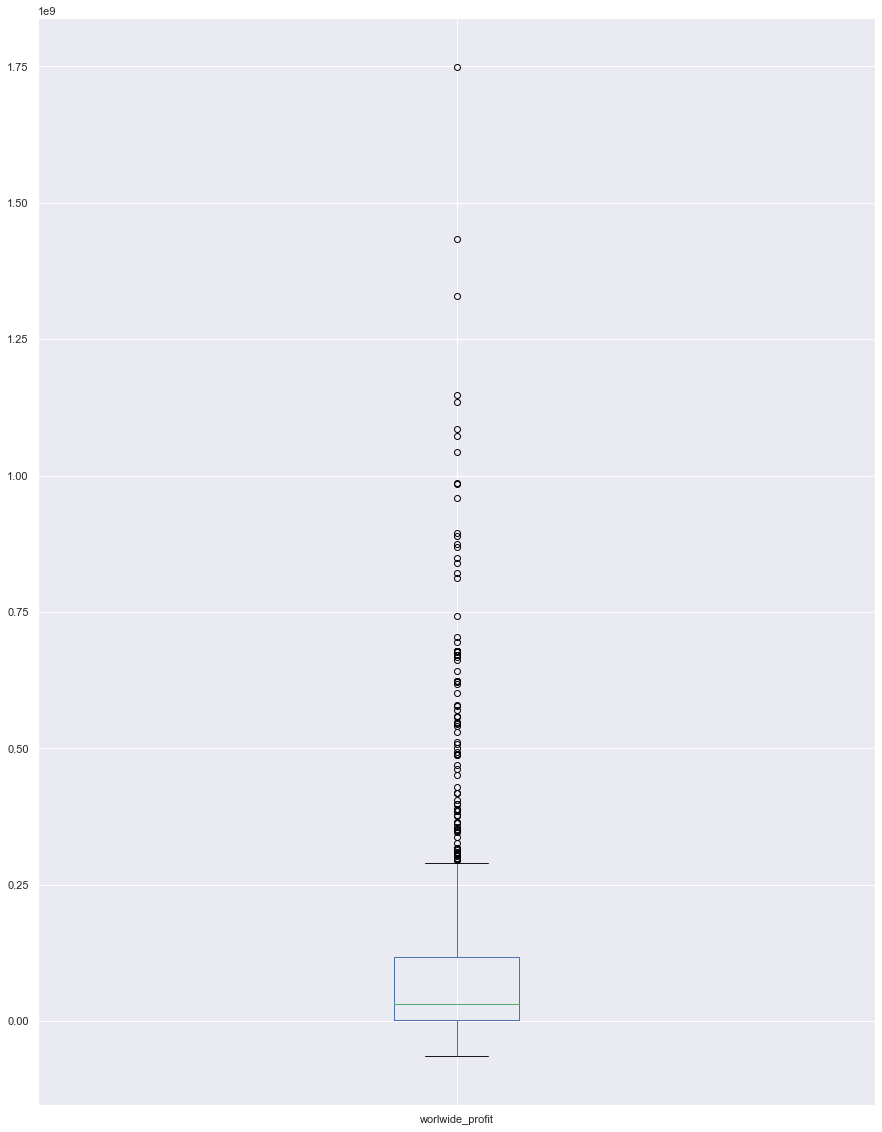

In [445]:
master2014_df['worlwide_profit'].plot.box(figsize = (15,20))

In [459]:
master2014_df['worlwide_profit'].sort_values(ascending = False)[:88].sum()

55728977108

In [460]:
master2014_df['worlwide_profit'].sort_values(ascending = False)[88:].sum()

41505803959

In [454]:
len(master2014_df['worlwide_profit'].sort_values(ascending = False)[60:])

822

In [461]:
# % total profit of top 10% movies
55728977108/(55728977108 + 41505803959)

0.5731382998600031

In [502]:
# correlation of budget and global profit
master2014_df['production_budget'].corr(master2014_df['worlwide_profit'])

0.7013841018838237

C:\Users\Nick\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

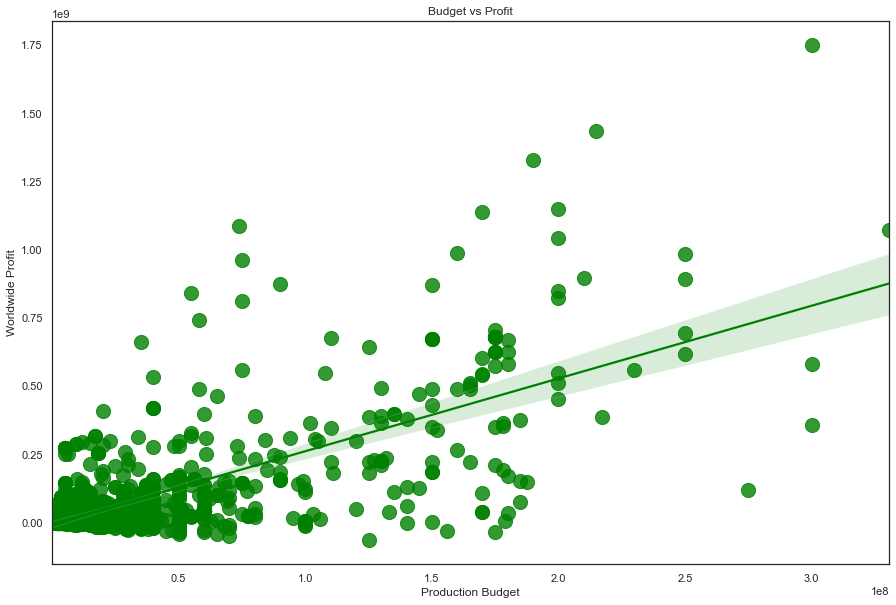

In [685]:
gr = sns.regplot(master2014_df['production_budget'],master2014_df['worlwide_profit'], color = 'green',  scatter_kws={'s':200}).set(title='Budget vs Profit', ylabel='Worldwide Profit', xlabel='Production Budget' )
sns.set(rc = {'figure.figsize':(15,6)})
sns.set_style('white')

;

In [565]:
master2014_df['averagerating']

6.5